In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
from nltk.corpus import wordnet as wn

In [4]:
dog = wn.synset('dog.n.01')
dog

Synset('dog.n.01')

In [5]:
def closure_graph(synset, fn):
    seen = set()
    graph = nx.DiGraph()
    labels = {}

    def recurse(s):
        if not s in seen:
            seen.add(s)
            graph.add_node(s.name)
            labels[s.name] = s.name().split(".")[0]
            
            for s1 in fn(s):
                graph.add_node(s1.name)
                graph.add_edge(s.name, s1.name)
                recurse(s1)

    recurse(synset)
    
    return graph, labels

In [6]:
graph, labels = closure_graph(dog, lambda s: s.hypernyms())

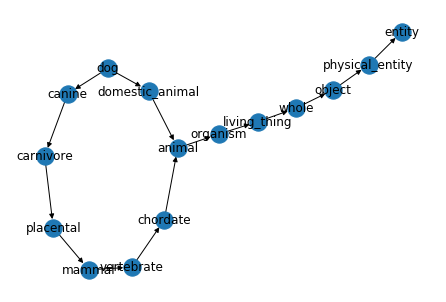

In [7]:
nx.draw(graph, pos=graphviz_layout(graph), labels=labels)

In [8]:
def wordnet_graph(words):
     
    """
    Construct a semantic graph and labels for a set of object categories using 
    WordNet and NetworkX. 

    Parameters: 
    ----------
     words : set
         Set of words for all the categories. 

     Returns: 
     -------
     graph : graph
         Graph object containing edges and nodes for the network. 
     labels : dict
         Dictionary of all synset labels. 
     """
     
    graph = nx.DiGraph()
    labels = {}
    seen = set()

    def recurse(s):

        """ Recursively move up semantic hierarchy and add nodes / edges """  

        if not s in seen:                               # if not seen...
            seen.add(s)                                 # add to seen
            graph.add_node(s.name)                      # add node
            labels[s.name] = s.name().split(".")[0]     # add label
            hypernyms = s.hypernyms()                   # get hypernyms

            for s1 in hypernyms:                        # for hypernyms
                graph.add_node(s1.name)                 # add node
                graph.add_edge(s.name, s1.name)         # add edge between
                recurse(s1)                             # do so until top

    # build network containing all categories          
    for word in words:                                  # for all categories
        s = wn.synset(str(word) + str('.n.01'))         # create synset            
        recurse(s)                                      # call recurse

    # return the graph and labels    
    return graph, labels

In [25]:
categories = set()
categories.add('airplane')
categories.add('automobile')
categories.add('bird')
categories.add('cat')
categories.add('deer')
categories.add('dog')
categories.add('frog')
categories.add('horse')
categories.add('ship')
categories.add('truck')

In [26]:
# create the graph and labels
graph, labels = wordnet_graph(categories)
 
print(f'labels: {labels}')

labels: {<bound method Synset.name of Synset('bird.n.01')>: 'bird', <bound method Synset.name of Synset('vertebrate.n.01')>: 'vertebrate', <bound method Synset.name of Synset('chordate.n.01')>: 'chordate', <bound method Synset.name of Synset('animal.n.01')>: 'animal', <bound method Synset.name of Synset('organism.n.01')>: 'organism', <bound method Synset.name of Synset('living_thing.n.01')>: 'living_thing', <bound method Synset.name of Synset('whole.n.02')>: 'whole', <bound method Synset.name of Synset('object.n.01')>: 'object', <bound method Synset.name of Synset('physical_entity.n.01')>: 'physical_entity', <bound method Synset.name of Synset('entity.n.01')>: 'entity', <bound method Synset.name of Synset('airplane.n.01')>: 'airplane', <bound method Synset.name of Synset('heavier-than-air_craft.n.01')>: 'heavier-than-air_craft', <bound method Synset.name of Synset('aircraft.n.01')>: 'aircraft', <bound method Synset.name of Synset('craft.n.02')>: 'craft', <bound method Synset.name of Sy

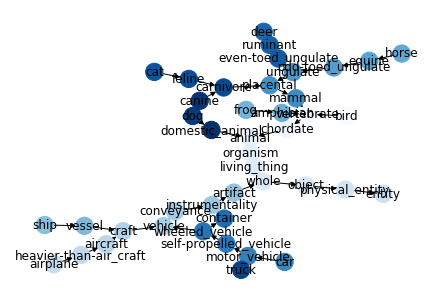

In [29]:
# draw the graph
pos=graphviz_layout(graph)
# nx.draw_networkx_labels(graph, pos=pos, labels=labels)
nx.draw(graph, 
        pos=graphviz_layout(graph), 
        labels=labels,  
        cmap=plt.cm.Blues,
        node_color=range(len(graph)),
        prog='dot')
plt.savefig('WN18.png', format='PNG')
plt.show()